# Regression Exercise 

## Problem definition and objectives 

Problem Definition: 

"Diamonds are forever", but also very expensive. The price of diamonds are influenced by several factors. Here, we explore how the physical features such as carat, color, clarity, cut and overall dimensions influence the price.
In this exercise we develop a regression model to predict the price of diamonds based on the above mentioned characteristics. Such a predictive model can be used to assist jewelers and/or buyers in making informed decisions about diamond pricing.

Objective: 

1. Understand the Data: Understand the distribution of each feature and the target price variable. 
2. Select Relevant Features: What are the factors that strongly influence the pricing of diamonds (to use in the regression model)
3. Build and Train Predictive Model: Train Linear Regression model
4. Evaluate Performance: Measure the performance of the model by using metrics such as R-squared, RMSE, MAE and MAE%
5. Interpret Results: Determine how the different features influence the price of diamonds

## Inspection 

Import all python libaries that we need for the project.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Display the first few rows
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


The Meaning of the different columns: 

1. carat: The weight of the diamond (a measure of size).
2. cut: The quality of the cut (options: Fair, Good, Very Good, Premium, Ideal).
3. color: The diamond color, from J (worst) to D (best).
4. clarity: The clarity of the diamond (options: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF), indicating the presence of inclusions or blemishes.
5. depth: The total depth percentage, calculated as:
depth=zmean(x,y)×100
depth=mean(x,y)z​×100
6. table: The width of the top of the diamond relative to the widest point (measured as a percentage).
7. price: The price of the diamond in US dollars.
8. x: Length of the diamond in millimeters.
9. y: Width of the diamond in millimeters.
10. z: Depth of the diamond in millimeters.

### Correlation matrix 

Before fitting a regression model, we are conducting a correlation matrix. This is essential to identify relationships between independent variables ("carat", "depth", "x" etc.) and our target variable ("price"). Here, we also find out if there ís multicollinearity among the prediictotrs, which can destabilize the model. 

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


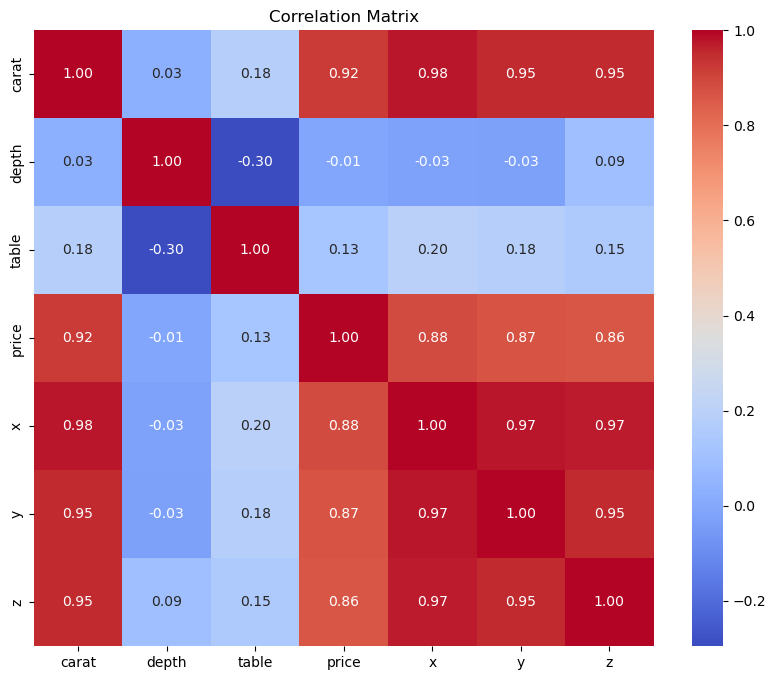

In [41]:
# Select numeric columns
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

# Display the matrix
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [60]:
# Select features with high correlation to the target variable (e.g., 'price')
target_correlation = correlation_matrix['price']
print(target_correlation)

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


Based on the correlation matrix we keep the features: carat, x, y, z for the regression because they are strongly correlated with the target feature: price. It suggets that these features are highly relevant for predicting the price.

In [90]:
# Check pairwise correlation between features
corr_matrix = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']].corr()
print(corr_matrix)

          carat     depth     table         x         y         z
carat  1.000000  0.028224  0.181618  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.195344  0.183760  0.150929
x      0.975094 -0.025289  0.195344  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.970772  0.952006  1.000000


With this table we can check for multicollinearity. We see that carat, y, x and z are strongly correlated with each other. Therefore, it is possible to drop some of the highly correlated features to avoid multicollinearity and improve the stability of our model. For example, we could keep carat and drop x and y, as they are strongly correlated with both carat and each other.

### Visualize Distributions

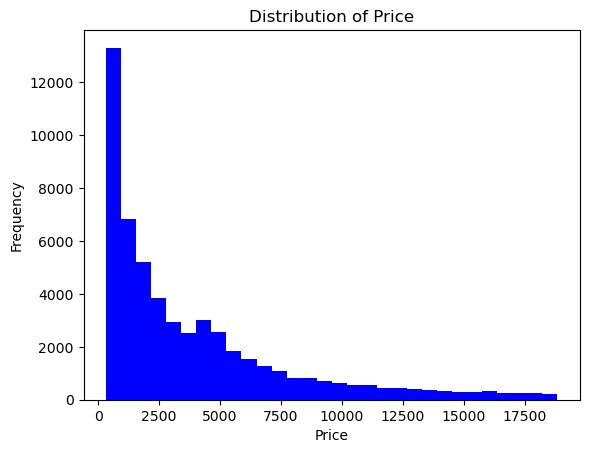

In [91]:
# Histogram
# Example: Visualizing the distribution of the 'price' column
plt.hist(diamonds['price'], bins=30, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

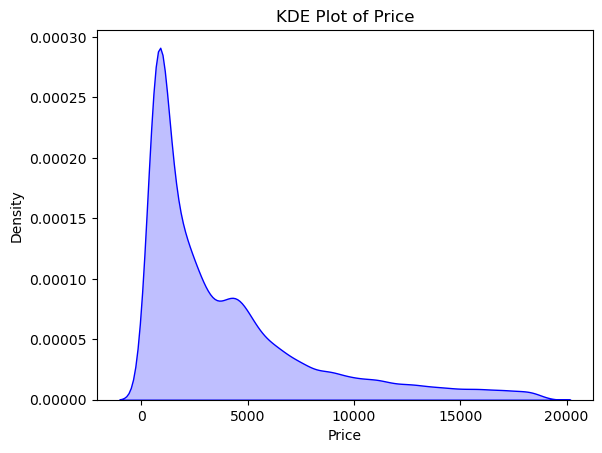

In [92]:
# Kernel Density Estimation (KDE) Plot
# # Example: Visualizing the distribution of the 'price' column
sns.kdeplot(diamonds['price'], color='blue', fill=True)
plt.title('KDE Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

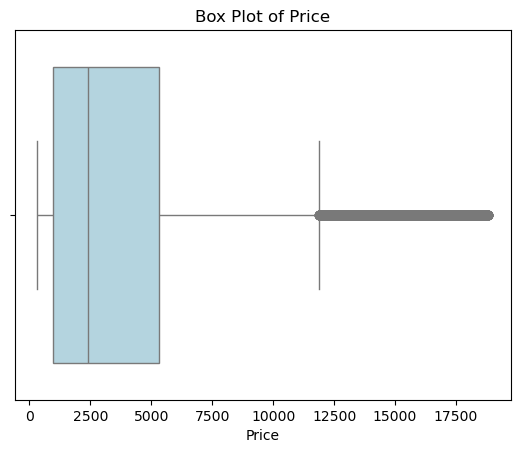

In [93]:
# Example: Box plot of the 'price' column
sns.boxplot(x=diamonds['price'], color='lightblue')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

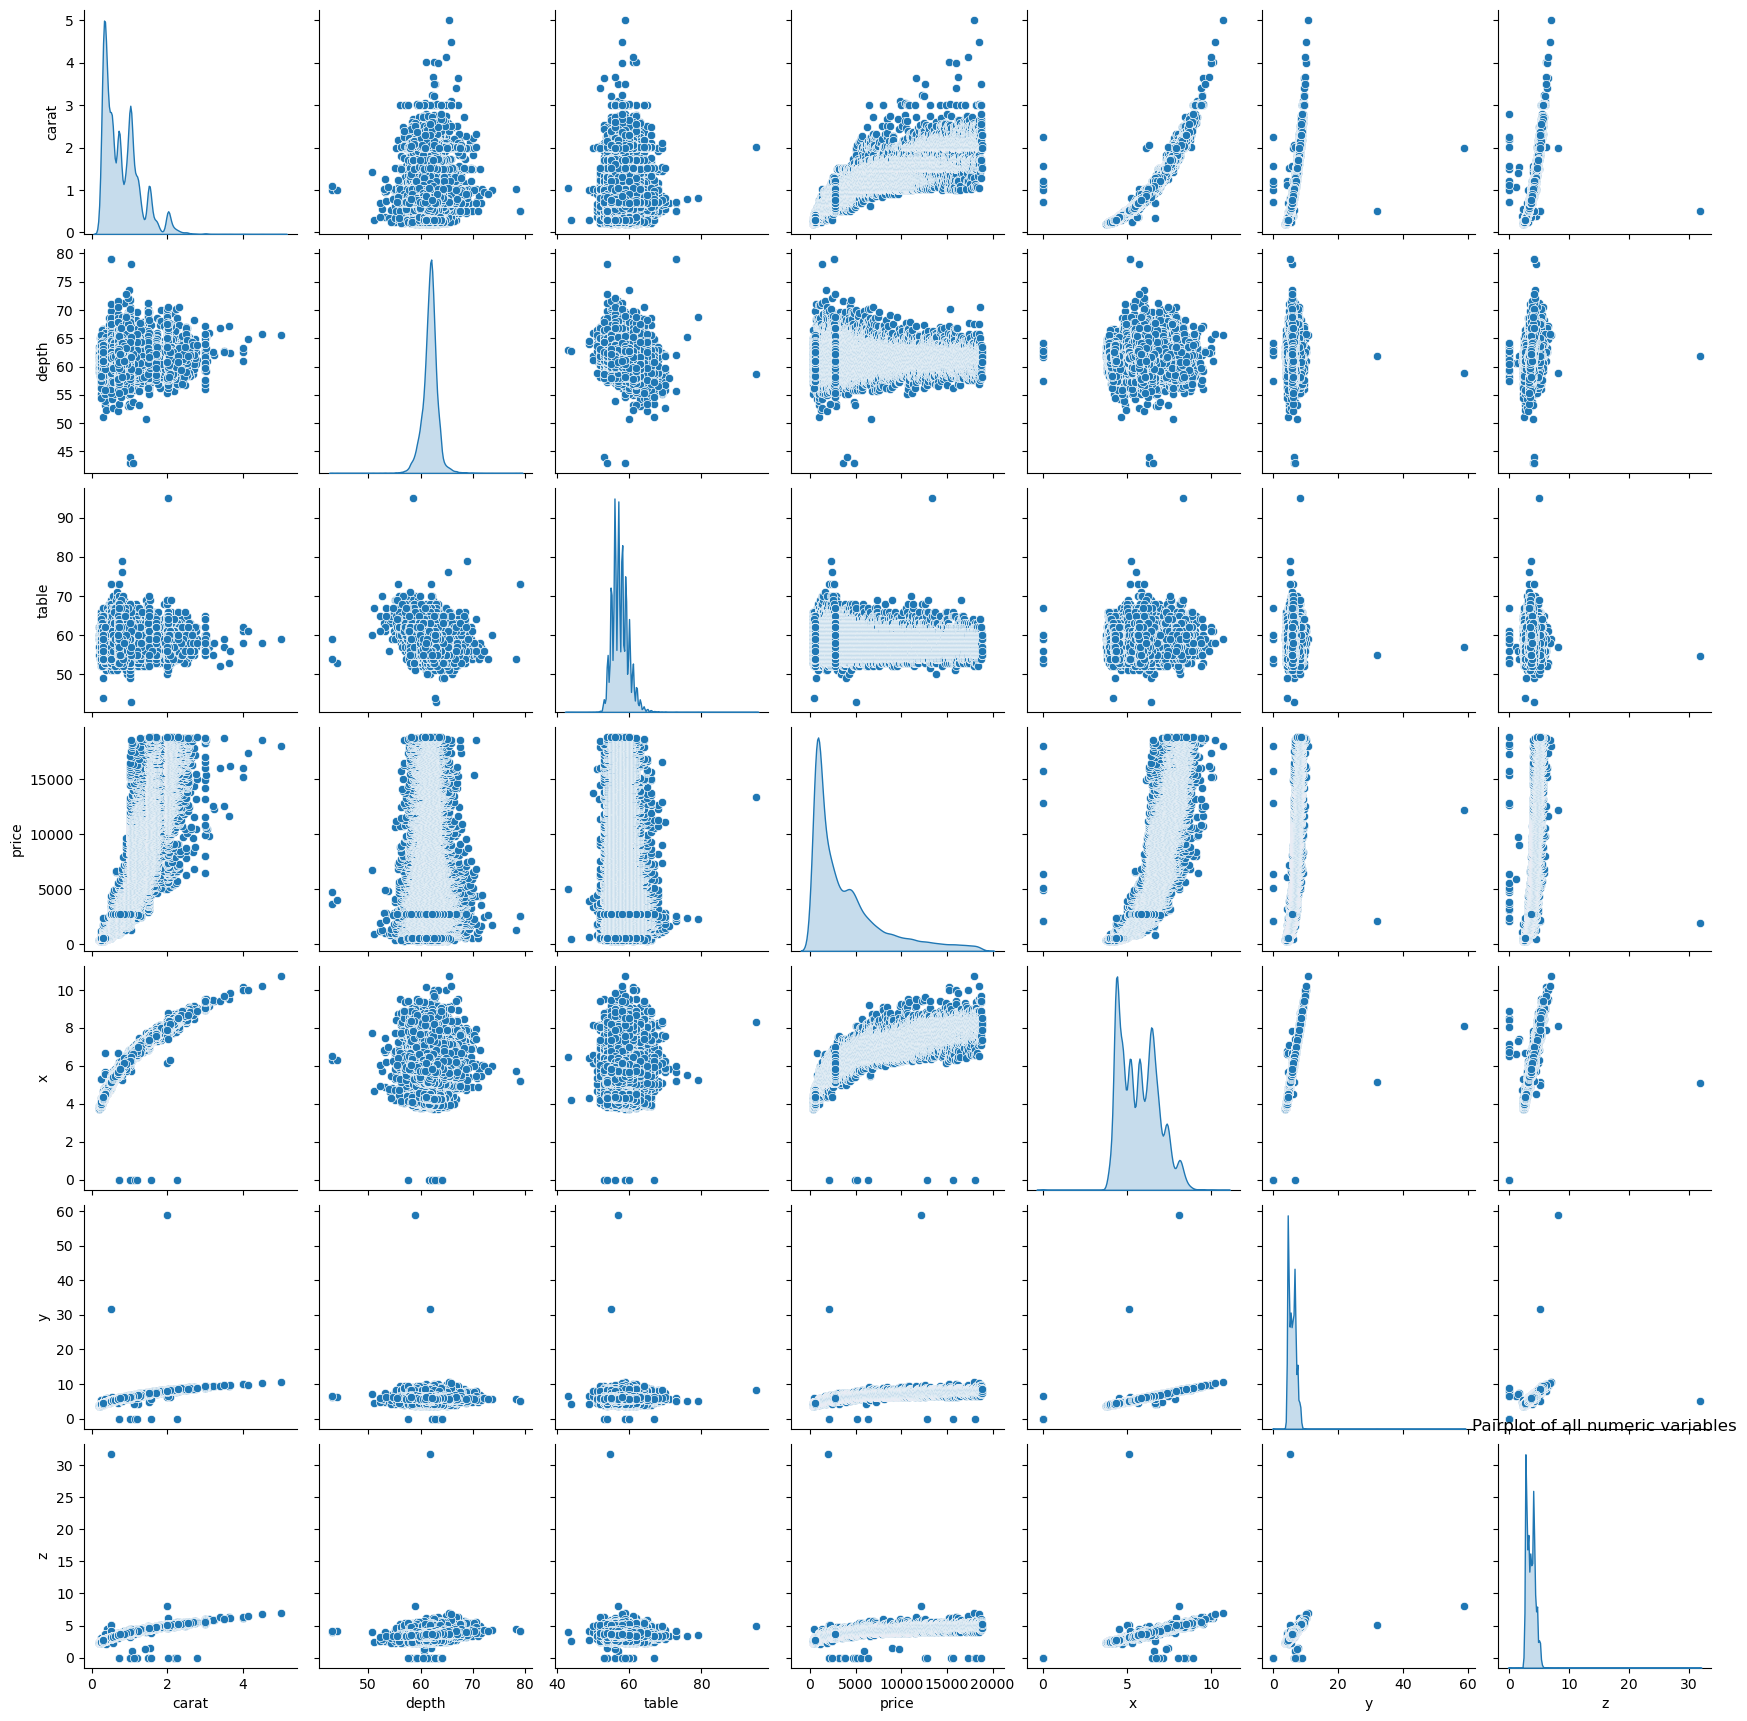

In [ ]:
# Pair plot of all numeric columns
sns.pairplot(numeric_columns, diag_kind='kde')
plt.show()

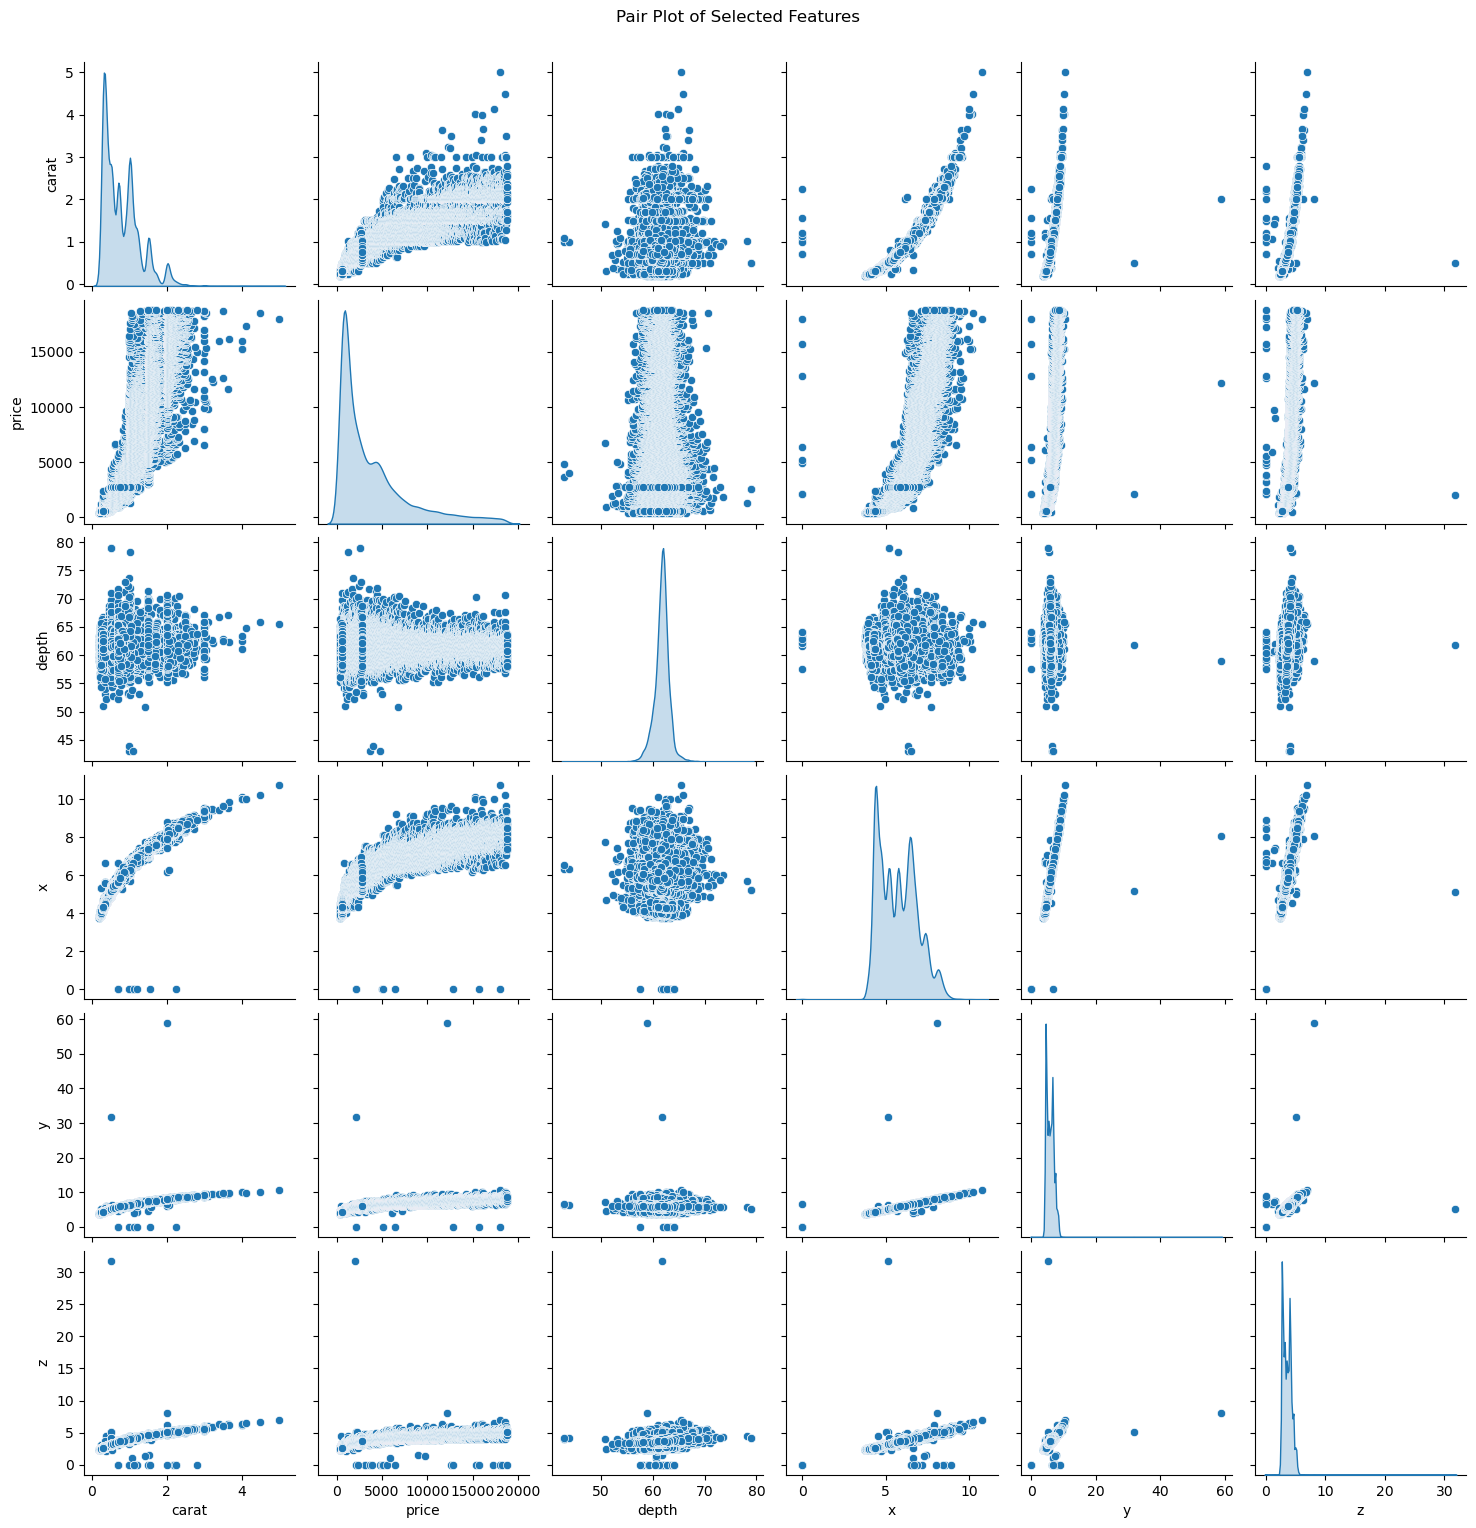

In [148]:
# Pair plot of selected numeric columns
selected_columns = diamonds[['carat', 'price', 'depth', 'x', 'y', 'z']]
pairplot = sns.pairplot(selected_columns, diag_kind='kde')
pairplot.fig.suptitle("Pair Plot of Selected Features", y=1.02)  # Add a title
plt.show()


### Preparing Data for Regression

Since the dataset has both numeric and categorical columns, we need to process the data before applying regression. For simplicity, we'll focus on using numeric columns for regression (e.g., predicting price based on carat, depth, etc.). Moreover, because we detected multicollinearrity between carat, x, y and z, we only look at carat and z in the following regression model. 

In [149]:
independent_columns = ['carat', 'z']
target_column = 'price'

# Extract features (X) and target (y)
X = diamonds[independent_columns]
y = diamonds[target_column]

# Display the first few rows of X and y
print(X.head())
print(y.head())


   carat     z
0   0.23  2.43
1   0.21  2.31
2   0.23  2.31
3   0.29  2.63
4   0.31  2.75
0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


#### Split the dataframe into Train and Test Data

In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (43152, 2)
Test set size: (10788, 2)


## Implementing Pipeline

We use a Linear Regression to try to model to predict the price of diamonds based on the numeric features of the dataframe

In [151]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Scale features
    ('regressor', LinearRegression())   # Step 2: Linear Regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

## Fit a Regression Model to the dataframe

In [152]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate metrics / Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calculate MAE%
mean_actual = np.mean(y_test)
mae_percent = (mae / mean_actual) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error Percentage (MAE%): {mae_percent:.2f}%")

Mean Absolute Error (MAE): 946.8119518873062
Root Mean Squared Error (RMSE): 1524.9255593244034
R-Squared: 0.8537193130959783
Mean Absolute Error Percentage (MAE%): 24.24%


#### Visualize the Results 

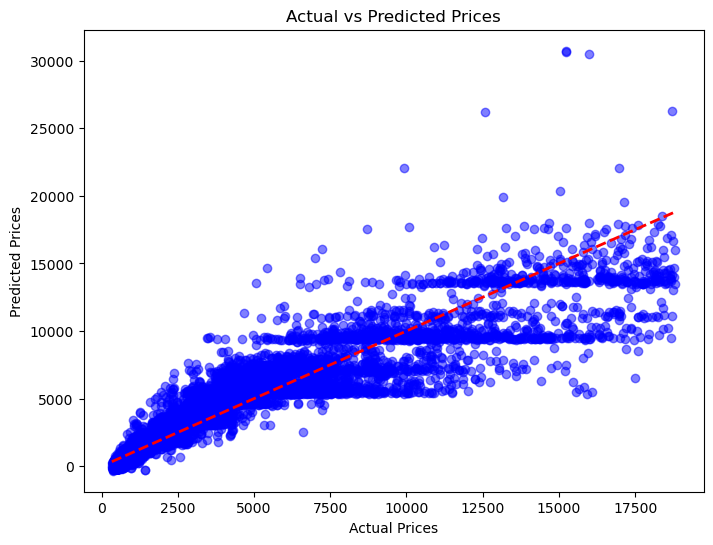

In [153]:
# Visualize the Results 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Residuals 

Now, we measure how far off our models is between the predictions and the actual data point. We calculate and visualize the differences between observed actual values and the predicted values. 

Mean Absolute Error (MAE): 946.81
Root Mean Squared Error (RMSE): 1524.93
R-Squared: 0.85

Residuals Summary:
Mean of Residuals: -22.56
Standard Deviation of Residuals: 1524.76


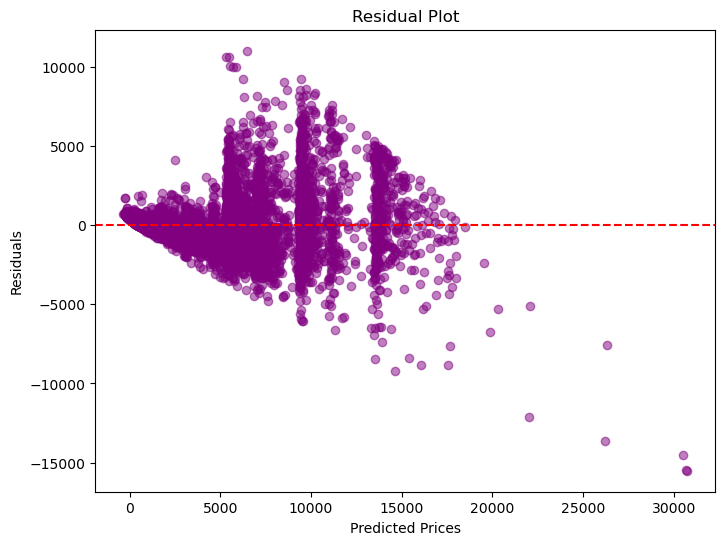

In [158]:
# Visualize the residuals
residuals = y_test - y_pred

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Residual analysis: Summary statistics
print("\nResiduals Summary:")
print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Observations: 

- The model has a R-squared of 0.85, which is quite high, meaning the regression model captures most of the variation in the data.
- On average, the regression model predicts the prices of the diamonds by a deviation of $946.81.
- The MAE is 946.81 and the RMSE is 1524.93 which suggests that there are still considerable errors in individual predictions.
- The mean residual of -22.56 indicates that the model underpredicts the target value. However, this average is on a smaller scale compared to the errors (RMSE and MAE). 

## Conclusion 

The model we built can capture most variations in our data. However, there are still signifant errors (maybe outliners) in our model. Meaning to improve the model, we should look at the individual errors to improve the model